[View in Colaboratory](https://colab.research.google.com/github/sriramjaju/projetcs/blob/master/fastai_apple_orange_classifier.ipynb)

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
!pip install fastai
!pip install torch

    100% |████████████████████████████████| 122kB 6.0MB/s 
    100% |████████████████████████████████| 1.5MB 8.3MB/s 
    100% |████████████████████████████████| 112kB 19.9MB/s 
    100% |████████████████████████████████| 184kB 16.3MB/s 
    100% |████████████████████████████████| 3.6MB 8.2MB/s 
    100% |████████████████████████████████| 496.4MB 32kB/s 
    100% |████████████████████████████████| 51kB 21.1MB/s 
    100% |████████████████████████████████| 2.2MB 886kB/s 
    100% |████████████████████████████████| 61kB 23.8MB/s 
    100% |████████████████████████████████| 11.6MB 2.5MB/s 
    100% |████████████████████████████████| 92kB 23.5MB/s 
    100% |████████████████████████████████| 71kB 23.3MB/s 
    100% |████████████████████████████████| 901kB 2.6MB/s 
    100% |████████████████████████████████| 112kB 30.1MB/s 
    100% |████████████████████████████████| 81kB 28.0MB/s 
    100% |████████████████████████████████| 15.8MB 2.3MB/s 
    100% |████████████████████████████████| 4.4MB 

In [0]:
# This file contains all the main external libs we'll use# This  
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [81]:
torch.cuda.is_available()

True

In [82]:
torch.backends.cudnn.enabled

True

In [76]:
!rm -rf *
!wget https://github.com/AI6-Bangalore-Chapter/2018-cycle-2/raw/master/Sessions/Session_4/appleorange.zip


Redirecting output to ‘wget-log’.


In [83]:
from google.colab import files
uploaded = files.upload()

In [84]:
!ls

appleorange  appleorange.zip  appleorange.zip.1  sample_data  wget-log


In [11]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "appleorange.zip" with length 1045635 bytes


In [12]:
!ls
!unzip appleorange.zip

appleorange.zip  sample_data
Archive:  appleorange.zip
   creating: appleorange/test/
   creating: appleorange/test/apple/
  inflating: appleorange/test/apple/apple_010.jpg  
  inflating: appleorange/test/apple/apple_011.jpg  
  inflating: appleorange/test/apple/apple_016.jpg  
  inflating: appleorange/test/apple/apple_019.jpg  
  inflating: appleorange/test/apple/apple_036.jpg  
  inflating: appleorange/test/apple/apple_040.jpg  
  inflating: appleorange/test/apple/apple_043.jpg  
  inflating: appleorange/test/apple/apple_045.jpg  
  inflating: appleorange/test/apple/apple_050.jpg  
  inflating: appleorange/test/apple/apple_056.jpg  
  inflating: appleorange/test/apple/apple_057.jpg  
  inflating: appleorange/test/apple/apple_059.jpg  
   creating: appleorange/test/orange/
  inflating: appleorange/test/orange/orange_001.jpg  
  inflating: appleorange/test/orange/orange_012.jpg  
  inflating: appleorange/test/orange/orange_014.jpg  
  inflating: appleorange/test/orange/orange_016.jpg  

In [0]:
PATH = "appleorange/"
sz=224

In [86]:
os.listdir(PATH)

['train', 'valid', 'tmp', 'models']

In [87]:
os.listdir(f'{PATH}valid')

['orange', 'apple']

In [88]:
files = os.listdir(f'{PATH}valid/apple')[:5]
files

['apple_011.jpg',
 'apple_056.jpg',
 'apple_036.jpg',
 'apple_057.jpg',
 'apple_019.jpg']

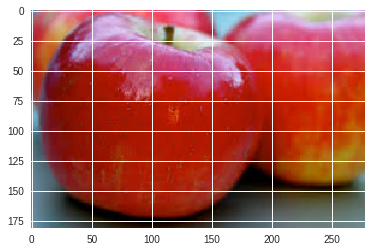

In [91]:
img = plt.imread(f'{PATH}valid/apple/{files[3]}')
plt.imshow(img);

In [92]:
img.shape

(181, 278, 3)

In [93]:
img[:4,:4]

array([[[ 77, 135, 198],
        [ 84, 136, 196],
        [ 94, 135, 191],
        [107, 133, 182]],

       [[ 83, 133, 192],
        [ 90, 133, 188],
        [100, 132, 183],
        [114, 131, 175]],

       [[ 93, 130, 182],
        [ 99, 130, 177],
        [110, 127, 170],
        [125, 125, 161]],

       [[103, 126, 170],
        [110, 125, 164],
        [123, 122, 156],
        [137, 119, 145]]], dtype=uint8)

In [97]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.001, 10)

epoch      trn_loss   val_loss   accuracy   
    0      0.8541     0.576211   0.708333  
    1      0.788665   0.564408   0.75      
    2      0.779479   0.545385   0.75      
    3      0.699916   0.513028   0.833333  
    4      0.671016   0.468341   0.916667  
    5      0.639897   0.427537   0.916667  
    6      0.634843   0.38921    0.916667  
    7      0.610974   0.35333    0.916667  
    8      0.579774   0.320401   0.875     
    9      0.553603   0.296439   0.916667  



[array([0.29644]), 0.9166666865348816]

In [98]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [99]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['apple', 'orange']

In [100]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(24, 2)

In [101]:
log_preds[:10]

array([[-0.22294, -1.61024],
       [-0.52313, -0.89812],
       [-0.13168, -2.09252],
       [-0.24693, -1.51956],
       [-0.05627, -2.90568],
       [-0.85371, -0.55483],
       [-0.13727, -2.05362],
       [-0.17383, -1.83535],
       [-0.13388, -2.077  ],
       [-0.20818, -1.67165]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(orange)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 1), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


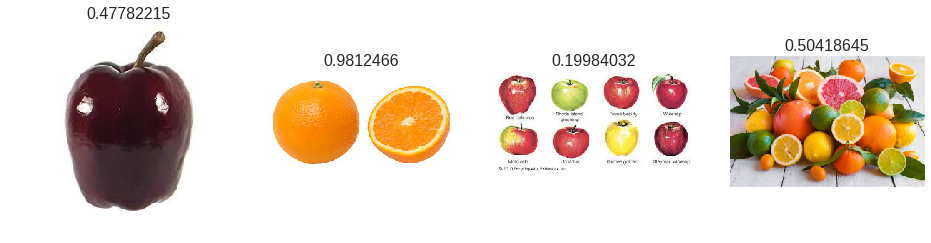

In [107]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


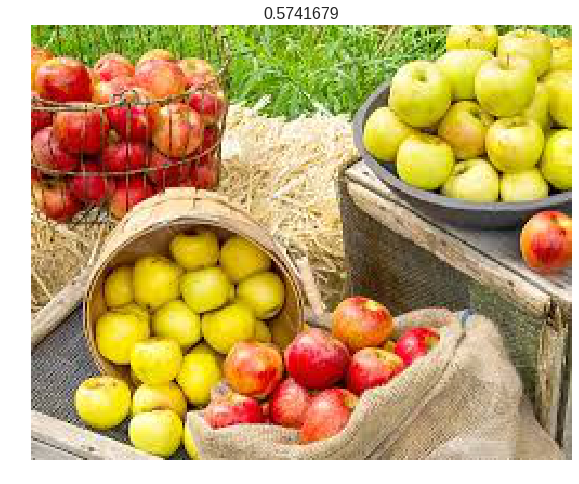

In [110]:
# 2. A few incorrect labels at random
#rand_by_correct(False)
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct apples


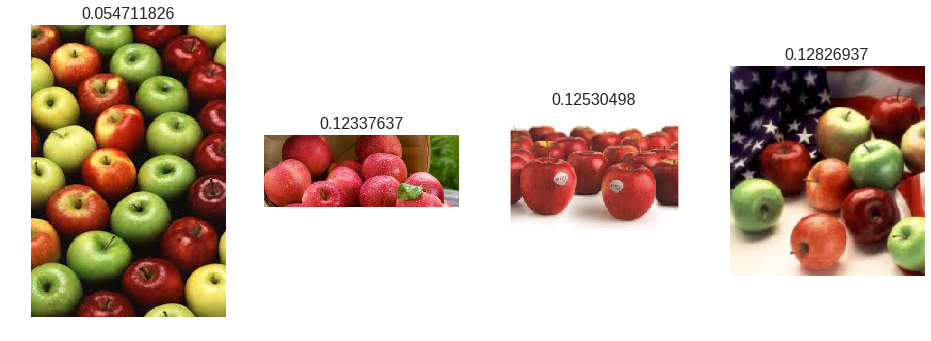

In [112]:
plot_val_with_title(most_by_correct(0, True), "Most correct apples")

Most correct orange


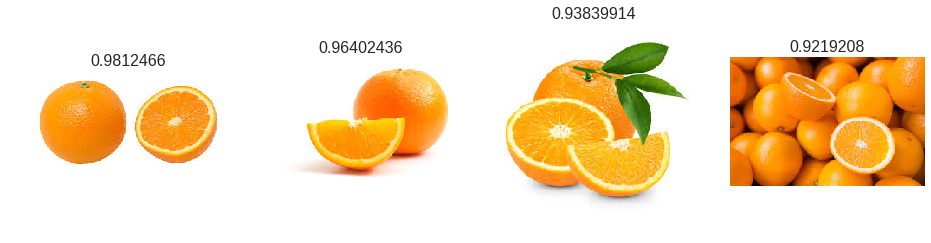

In [113]:
plot_val_with_title(most_by_correct(1, True), "Most correct orange")

Most incorrect apple


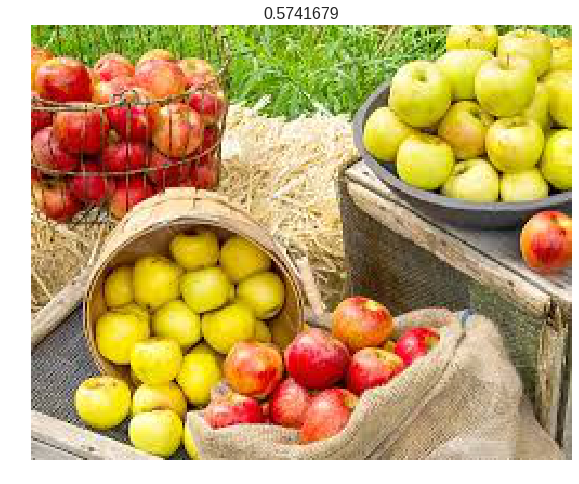

In [114]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect apple")

Most incorrect orange


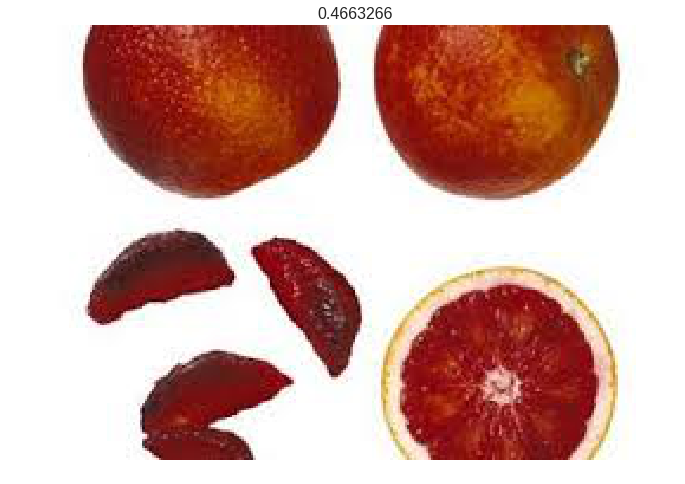

In [115]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect orange")

Most uncertain predictions


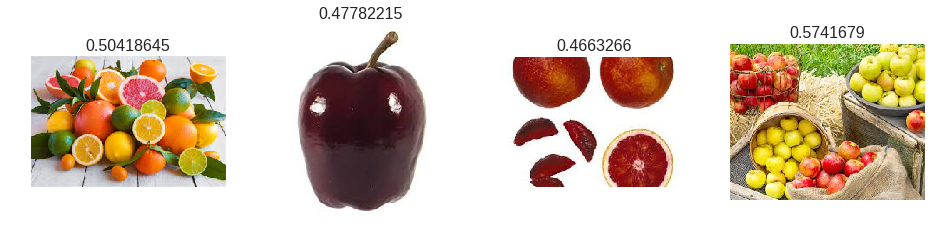

In [116]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [77]:
!ls

appleorange  appleorange.zip  appleorange.zip.1  sample_data  wget-log
